In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications.vgg19 import VGG19, preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from sklearn.metrics.pairwise import cosine_similarity
import os
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics.pairwise import euclidean_distances, manhattan_distances
from scipy.spatial.distance import correlation

In [2]:
# Load the pre-trained VGG19 model + higher level layers
base_model = VGG19(weights='imagenet')
model = Model(inputs=base_model.input, outputs=base_model.get_layer('fc1').output)

In [3]:
def extract_face(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30), flags=cv2.CASCADE_SCALE_IMAGE)
    
    if len(faces) == 0:
        return None
    
    x, y, w, h = max(faces, key=lambda rect: rect[2] * rect[3])
    face = img[y:y+h, x:x+w]
    return face

In [4]:
def extract_features(img_path, model):
    face = extract_face(img_path)
    if face is None:
        print(f"No face detected in image: {img_path}")
        return None
    
    face = cv2.resize(face, (224, 224))
    img_data = image.img_to_array(face)
    img_data = np.expand_dims(img_data, axis=0)
    img_data = preprocess_input(img_data)
    
    features = model.predict(img_data)
    return features.flatten()

In [5]:
def load_dataset_2(dataset_path, model):
    features_2 = []
    image_paths_2 = []
    labels = []
    for actor in os.listdir(dataset_path):
        actor_dir = os.path.join(dataset_path, actor)
        if os.path.isdir(actor_dir):
            for img_file in os.listdir(actor_dir):
                img_path = os.path.join(actor_dir, img_file)
                if img_path.endswith(('jpg', 'jpeg', 'png')):  # Check for valid image files
                    embedding = extract_features(img_path, model)
                    if embedding is not None:
                        features_2.append(embedding)
                        labels.append(actor)
                        image_paths_2.append(img_path)
                    
    return np.array(features_2), image_paths_2, labels

In [6]:
dataset_path = "D:\\Programming\\Project\\dataset_5"
# Load dataset and extract features
dataset_features, dataset_image_paths, labels = load_dataset_2(dataset_path, model)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step
No face detected in image: D:\Programming\Project\dataset_5\abhay_deol\0d2583fb3e.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step
No face detected in image: D:\Programming\Project\dataset_5\abhay_deol\38d428ba5c.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step
1/1 ━━━━━

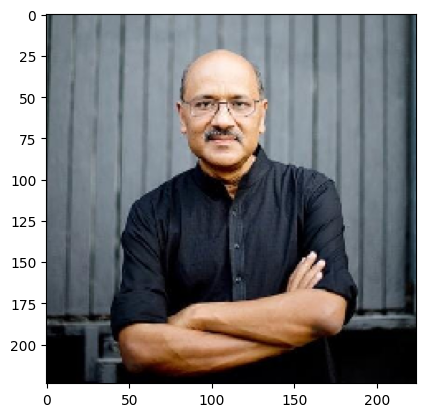

In [19]:
given_img_path = 'D:\\Programming\\Project\\Test image.jpg'
input_img = image.load_img(given_img_path, target_size=(224, 224))
input_img = image.img_to_array(input_img) / 255.0
plt.imshow(input_img)

In [20]:
# Cosine similarity (METHOD 1)
def find_similar_images_cosine(given_img_path, dataset_features, dataset_image_paths, model, top_n=5):
    given_img_features = extract_features(given_img_path, model)
    if given_img_features is None:
        return [], []
    
    similarities = cosine_similarity([given_img_features], dataset_features)[0]
    similar_indices = similarities.argsort()[-top_n:][::-1]
    top_similarities = similarities[similar_indices]
    top_similar_images = [dataset_image_paths[i] for i in similar_indices]
    
    return top_similar_images, top_similarities

top_5_similar_images, top_5_similarities = find_similar_images_cosine(given_img_path, dataset_features, dataset_image_paths, model, top_n=5)

print("Top 5 similar images:")
for img_path, similarity in zip(top_5_similar_images, top_5_similarities):
    print(f"{img_path} - Similarity: {similarity * 100:.2f}%")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step
Top 5 similar images:
D:\Programming\Project\dataset_5\anupam_kher\3e634f6d35.jpg - Similarity: 80.24%
D:\Programming\Project\dataset_5\anupam_kher\78c451e967.jpg - Similarity: 77.09%
D:\Programming\Project\dataset_5\saif_ali_khan\132927fc74.jpg - Similarity: 76.89%
D:\Programming\Project\dataset_5\sachin_khedekar\b23918f7ce.jpg - Similarity: 75.25%
D:\Programming\Project\dataset_5\varun_dhawan\6e8c149dc0.jpg - Similarity: 75.13%


Displaying image: D:\Programming\Project\dataset_5\anupam_kher\3e634f6d35.jpg
Displaying image: D:\Programming\Project\dataset_5\anupam_kher\78c451e967.jpg
Displaying image: D:\Programming\Project\dataset_5\saif_ali_khan\132927fc74.jpg
Displaying image: D:\Programming\Project\dataset_5\sachin_khedekar\b23918f7ce.jpg
Displaying image: D:\Programming\Project\dataset_5\varun_dhawan\6e8c149dc0.jpg


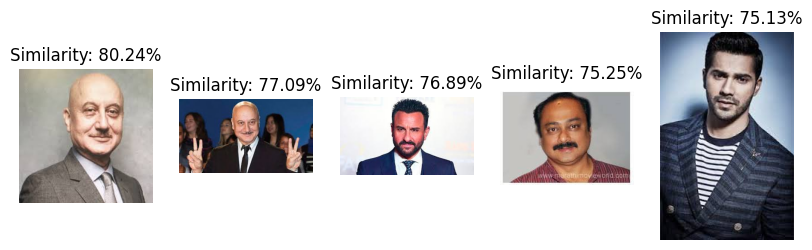

In [21]:
plt.figure(figsize=(10, 5))
idx = 0
for actor_image_path, similarity in zip(top_5_similar_images, top_5_similarities):
    print(f"Displaying image: {actor_image_path}")
    img = mpimg.imread(actor_image_path)
    plt.subplot(1, 5, idx + 1)
    plt.imshow(img)
    plt.title(f"Similarity: {similarity * 100:.2f}%")
    plt.axis('off')
    idx += 1
plt.show()

In [22]:
# Euclidean similarity (METHOD 2)
def find_similar_images_euclidean(given_img_path, dataset_features, dataset_image_paths, model, top_n=5):
    given_img_features = extract_features(given_img_path, model)
    if given_img_features is None:
        return [], []
    
    distances = euclidean_distances([given_img_features], dataset_features)[0]
    similar_indices = distances.argsort()[:top_n]
    top_distances = distances[similar_indices]
    
    min_distance, max_distance = distances.min(), distances.max()
    top_similarities = [(1 - (distance - min_distance) / (max_distance - min_distance)) * 100 for distance in top_distances]
    
    top_similar_images = [dataset_image_paths[i] for i in similar_indices]
    
    return top_similar_images, top_similarities

top_5_similar_images_euclidean, top_5_similarities_euclidean = find_similar_images_euclidean(given_img_path, dataset_features, dataset_image_paths, model, top_n=5)

print("Top 5 similar images (Euclidean Distance):")
for img_path, similarity in zip(top_5_similar_images_euclidean, top_5_similarities_euclidean):
    print(f"{img_path} - Similarity: {similarity:.2f}%")



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step
Top 5 similar images (Euclidean Distance):
D:\Programming\Project\dataset_5\anupam_kher\3e634f6d35.jpg - Similarity: 100.00%
D:\Programming\Project\dataset_5\sachin_khedekar\a178fe328e.jpg - Similarity: 92.01%
D:\Programming\Project\dataset_5\sachin_khedekar\b23918f7ce.jpg - Similarity: 91.85%
D:\Programming\Project\dataset_5\sachin_khedekar\a89ab564eb.jpg - Similarity: 91.27%
D:\Programming\Project\dataset_5\saif_ali_khan\31cfa241cf.jpg - Similarity: 91.16%


Displaying image: D:\Programming\Project\dataset_5\anupam_kher\3e634f6d35.jpg
Displaying image: D:\Programming\Project\dataset_5\sachin_khedekar\a178fe328e.jpg
Displaying image: D:\Programming\Project\dataset_5\sachin_khedekar\b23918f7ce.jpg
Displaying image: D:\Programming\Project\dataset_5\sachin_khedekar\a89ab564eb.jpg
Displaying image: D:\Programming\Project\dataset_5\saif_ali_khan\31cfa241cf.jpg


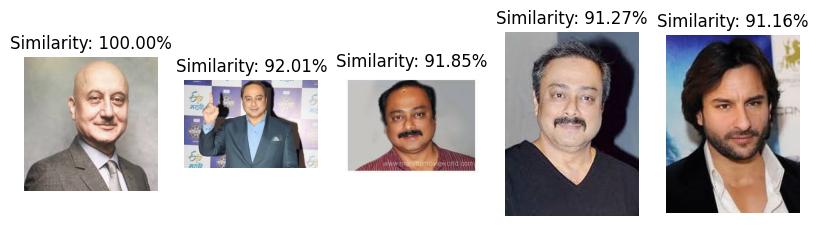

In [23]:
plt.figure(figsize=(10, 5))
idx = 0
for actor_image_path, similarity in zip(top_5_similar_images_euclidean, top_5_similarities_euclidean):
    print(f"Displaying image: {actor_image_path}")
    img = mpimg.imread(actor_image_path)
    plt.subplot(1, 5, idx + 1)
    plt.imshow(img)
    plt.title(f"Similarity: {similarity:.2f}%")
    plt.axis('off')
    idx += 1
plt.show()

In [24]:
# Manhattan similarity (METHOD 3)
def find_similar_images_manhattan(given_img_path, dataset_features, dataset_image_paths, model, top_n=5):
    given_img_features = extract_features(given_img_path, model)
    if given_img_features is None:
        return [], []
    
    distances = manhattan_distances([given_img_features], dataset_features)[0]
    similar_indices = distances.argsort()[:top_n]
    top_distances = distances[similar_indices]
    
    min_distance, max_distance = distances.min(), distances.max()
    top_similarities = [(1 - (distance - min_distance) / (max_distance - min_distance)) * 100 for distance in top_distances]
    
    top_similar_images = [dataset_image_paths[i] for i in similar_indices]
    
    return top_similar_images, top_similarities

top_5_similar_images_manhattan, top_5_similarities_manhattan = find_similar_images_manhattan(given_img_path, dataset_features, dataset_image_paths, model, top_n=5)

print("Top 5 similar images (Manhattan Distance):")
for img_path, similarity in zip(top_5_similar_images_manhattan, top_5_similarities_manhattan):
    print(f"{img_path} - Similarity: {similarity:.2f}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step
Top 5 similar images (Manhattan Distance):
D:\Programming\Project\dataset_5\anupam_kher\3e634f6d35.jpg - Similarity: 100.00%
D:\Programming\Project\dataset_5\sachin_khedekar\a178fe328e.jpg - Similarity: 94.50%
D:\Programming\Project\dataset_5\sachin_khedekar\a89ab564eb.jpg - Similarity: 93.81%
D:\Programming\Project\dataset_5\sachin_khedekar\b23918f7ce.jpg - Similarity: 92.86%
D:\Programming\Project\dataset_5\anupam_kher\78c451e967.jpg - Similarity: 91.86%


Displaying image: D:\Programming\Project\dataset_5\anupam_kher\3e634f6d35.jpg
Displaying image: D:\Programming\Project\dataset_5\sachin_khedekar\a178fe328e.jpg
Displaying image: D:\Programming\Project\dataset_5\sachin_khedekar\a89ab564eb.jpg
Displaying image: D:\Programming\Project\dataset_5\sachin_khedekar\b23918f7ce.jpg
Displaying image: D:\Programming\Project\dataset_5\anupam_kher\78c451e967.jpg


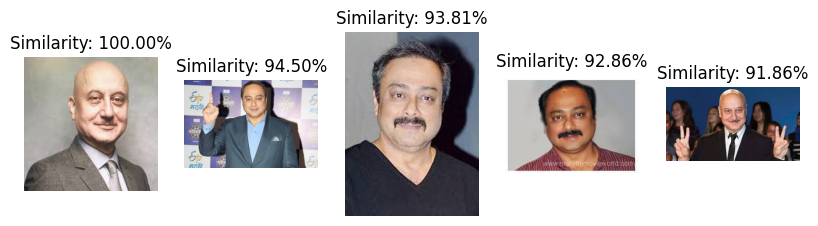

In [25]:
plt.figure(figsize=(10, 5))
idx = 0
for actor_image_path, similarity in zip(top_5_similar_images_manhattan, top_5_similarities_manhattan):
    print(f"Displaying image: {actor_image_path}")
    img = mpimg.imread(actor_image_path)
    plt.subplot(1, 5, idx + 1)
    plt.imshow(img)
    plt.title(f"Similarity: {similarity:.2f}%")
    plt.axis('off')
    idx += 1
plt.show()

In [26]:
# Correlation similarity (METHOD 4)
def find_similar_images_correlation(given_img_path, dataset_features, dataset_image_paths, model, top_n=5):
    given_img_features = extract_features(given_img_path, model)
    if given_img_features is None:
        return [], []
    
    distances = [correlation(given_img_features, dataset_feature) for dataset_feature in dataset_features]
    similar_indices = np.argsort(distances)[:top_n]
    top_distances = np.array(distances)[similar_indices]
    
    min_distance, max_distance = np.min(distances), np.max(distances)
    top_similarities = [(1 - (distance - min_distance) / (max_distance - min_distance)) * 100 for distance in top_distances]
    
    top_similar_images = [dataset_image_paths[i] for i in similar_indices]
    
    return top_similar_images, top_similarities

top_5_similar_images_correlation, top_5_similarities_correlation = find_similar_images_correlation(given_img_path, dataset_features, dataset_image_paths, model, top_n=5)

print("Top 5 similar images (Correlation Distance):")
for img_path, similarity in zip(top_5_similar_images_correlation, top_5_similarities_correlation):
    print(f"{img_path} - Similarity: {similarity:.2f}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step
Top 5 similar images (Correlation Distance):
D:\Programming\Project\dataset_5\anupam_kher\3e634f6d35.jpg - Similarity: 100.00%
D:\Programming\Project\dataset_5\anupam_kher\78c451e967.jpg - Similarity: 95.33%
D:\Programming\Project\dataset_5\saif_ali_khan\132927fc74.jpg - Similarity: 94.98%
D:\Programming\Project\dataset_5\sachin_khedekar\b23918f7ce.jpg - Similarity: 92.73%
D:\Programming\Project\dataset_5\varun_dhawan\6e8c149dc0.jpg - Similarity: 92.00%


Displaying image: D:\Programming\Project\dataset_5\anupam_kher\3e634f6d35.jpg
Displaying image: D:\Programming\Project\dataset_5\anupam_kher\78c451e967.jpg
Displaying image: D:\Programming\Project\dataset_5\saif_ali_khan\132927fc74.jpg
Displaying image: D:\Programming\Project\dataset_5\sachin_khedekar\b23918f7ce.jpg
Displaying image: D:\Programming\Project\dataset_5\varun_dhawan\6e8c149dc0.jpg


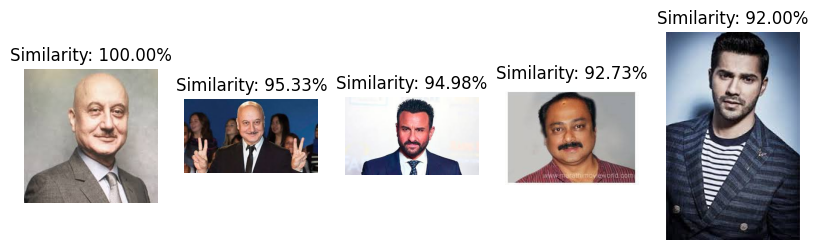

In [27]:
plt.figure(figsize=(10, 5))
idx = 0
for actor_image_path, similarity in zip(top_5_similar_images_correlation, top_5_similarities_correlation):
    print(f"Displaying image: {actor_image_path}")
    img = mpimg.imread(actor_image_path)
    plt.subplot(1, 5, idx + 1)
    plt.imshow(img)
    plt.title(f"Similarity: {similarity:.2f}%")
    plt.axis('off')
    idx += 1
plt.show()

In [28]:
# K-Nearest Neighbors (METHOD 5)
knn = NearestNeighbors(n_neighbors=5, algorithm='auto').fit(dataset_features)

def find_similar_images_knn(given_img_path, model, knn, labels, image_paths):
    embedding = extract_features(given_img_path, model)
    if embedding is None:
        return [], [], []
    
    distances, indices = knn.kneighbors([embedding])
    inverse_distances = 1 / distances[0]
    
    probabilities = inverse_distances**2 / np.sum(inverse_distances**2)
    sorted_indices = np.argsort(-probabilities)
    sorted_probabilities = probabilities[sorted_indices]
    sorted_similar_images = labels[indices[0][sorted_indices]]
    sorted_similar_image_paths = image_paths[indices[0][sorted_indices]]
    
    return sorted_similar_images[:3], sorted_similar_image_paths[:3], sorted_probabilities[:3]


In [29]:
def display_similar_images(input_image, similar_images, similar_image_paths, probabilities):
    fig, axes = plt.subplots(1, 4, figsize=(20, 5))
    input_img = image.load_img(input_image, target_size=(224, 224))
    input_img = image.img_to_array(input_img) / 255.0
    axes[0].imshow(input_img)
    axes[0].set_title(f"Input Image")
    axes[0].axis('off')
    for i in range(3):
        img = image.load_img(similar_image_paths[i], target_size=(224, 224))
        img = image.img_to_array(img) / 255.0  # Normalize the image to [0, 1] range
        axes[i+1].imshow(img)
        axes[i+1].set_title(f"{similar_images[i]}\nProbability: {probabilities[i]:.2f}")
        axes[i+1].axis('off')
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step


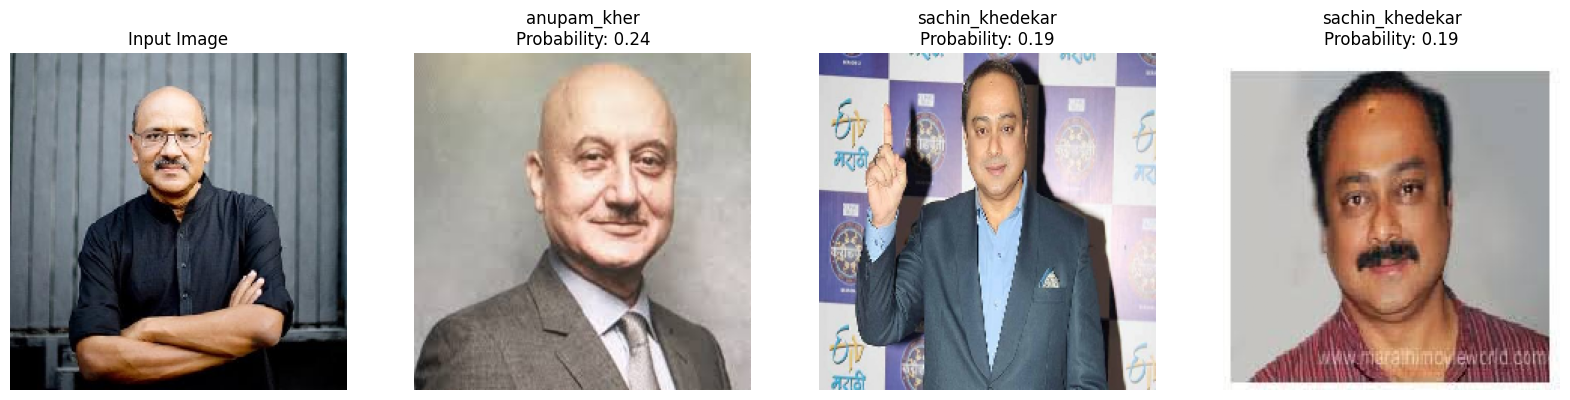

In [30]:
labels = np.array(labels)
image_paths_mod = np.array(dataset_image_paths)
similar_images, similar_image_paths, probabilities = find_similar_images_knn(given_img_path, model, knn, labels, image_paths_mod)
display_similar_images(given_img_path, similar_images, similar_image_paths, probabilities)
